In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Clean Data


In [2]:
df = pd.read_csv("data.csv")
df.sample(5)

,x,y
72,43.107820,57.812513
7,47.475640,71.546632
2,60.297327,97.379897
22,41.575643,51.391744
54,55.078096,71.139728


In [3]:
df = df.rename(columns = {'x' : 'height', 'y' : 'weight'})
df.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [4]:
df.describe()

,height,weight
count,99.000000,99.000000
mean,49.124564,73.149475
std,9.652463,16.216558
min,25.128485,41.412885
25%,41.648159,61.088576
50%,50.030174,72.247251
75%,56.798054,83.287411
max,70.346076,118.591217


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

height    0
weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height and Weight relation')

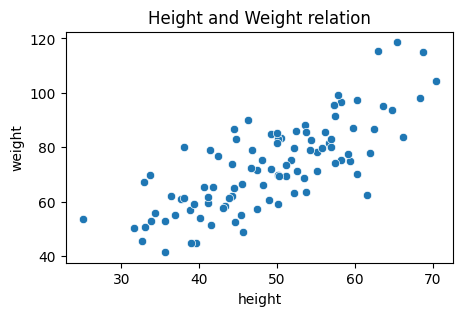

In [7]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'height', y = 'weight', data = df)
plt.title("Height and Weight relation")

In [8]:
# find co relation
df.corr()

,height,weight
height,1.000000,0.766264
weight,0.766264,1.000000


<Axes: >

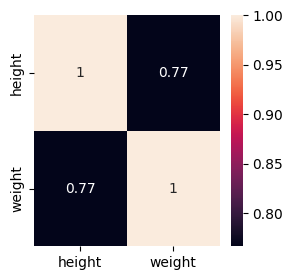

In [9]:
plt.figure(figsize = (3,3))
sns.heatmap(df.corr(), annot = True)

In [10]:
x = df[['height']]
y = df[['weight']]

In [11]:
x.head()

,height
0,48.955889
1,44.687196
2,60.297327
3,45.618644
4,38.816818


In [12]:
y.head()

,weight
0,60.723602
1,82.892504
2,97.379897
3,48.847153
4,56.877213


In [13]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size= .8, test_size = .2, random_state = 42)

In [14]:
df.shape

(99, 2)

In [15]:
# tarin data shape check

print(x_train.shape)
print(y_train.shape)

(79, 1)
(79, 1)


In [16]:
# test data shape check

print(x_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)


In [17]:
x_train.head()

,height
49,38.119824
70,53.660932
68,35.678094
15,55.142188
39,44.555608


In [18]:
y_train.head()

,weight
49,80.166275
70,63.642399
68,52.721735
15,78.211518
39,52.682983


# Model implementation

In [19]:
lr = LinearRegression()

In [20]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# train the model

model = lr.fit(x_train, y_train)

In [22]:
# check the train score
model.score(x_train, y_train)

0.5351098913885504

In [23]:
m = lr.coef_
m

array([[1.22304324]])

In [24]:
c = lr.intercept_
c

array([13.97932742])

In [25]:
x_train.head()

,height
49,38.119824
70,53.660932
68,35.678094
15,55.142188
39,44.555608


In [26]:
y_train.head()

,weight
49,80.166275
70,63.642399
68,52.721735
15,78.211518
39,52.682983


In [27]:
m*38.119824 + c

array([[60.60152039]])

In [28]:
x_train.head(), y_train.head()

(       height
 49  38.119824
 70  53.660932
 68  35.678094
 15  55.142188
 39  44.555608,
        weight
 49  80.166275
 70  63.642399
 68  52.721735
 15  78.211518
 39  52.682983)

In [29]:
# predection generate

pred_y = model.predict(x_train)
pred_y[0:10]

array([[60.60152043],
       [79.60896775],
       [57.61517889],
       [81.42060807],
       [68.47276295],
       [84.30975323],
       [69.52962123],
       [55.97022342],
       [67.99386951],
       [82.6292199 ]])

In [30]:
df['weight_predicted'] = model.predict(df[['height']])
df.head()

,height,weight,weight_predicted
0,48.955889,60.723602,73.854496
1,44.687196,82.892504,68.633701
2,60.297327,97.379897,87.725565
3,45.618644,48.847153,69.772901
4,38.816818,56.877213,61.453974


In [31]:
m* 48.955889+ c

array([[73.85449641]])

In [32]:
# error

df['error'] = df['weight'] - df['weight_predicted']
df.head()

,height,weight,weight_predicted,error
0,48.955889,60.723602,73.854496,-13.130893
1,44.687196,82.892504,68.633701,14.258803
2,60.297327,97.379897,87.725565,9.654332
3,45.618644,48.847153,69.772901,-20.925748
4,38.816818,56.877213,61.453974,-4.576760


In [33]:
y_pred = model.predict(x_test)

In [34]:
# mae for checking error

mae = mean_absolute_error(y_pred, y_test)
mae

6.898123580553088

In [35]:
# mse for checking error

mse = mean_squared_error(y_pred, y_test)
mse

72.23130683527735

In [36]:
# check the score

r_score = r2_score(y_test, y_pred)
r_score

0.692783029905275

# best fit line

Text(0.5, 1.0, 'Height and weight relation')

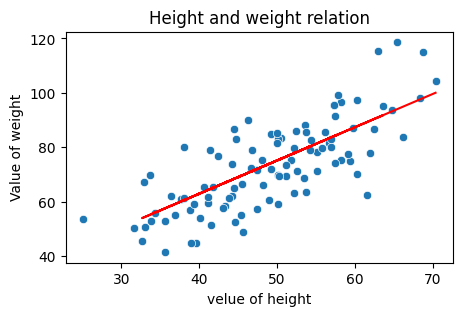

In [37]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'height', y = 'weight', data = df)
plt.plot(x_test, y_pred, color = 'r')
# plt.plot(x_test, y_test, color = 'black')
plt.xlabel("velue of height")
plt.ylabel("Value of weight")
plt.title("Height and weight relation")

In [ ]:
import pickle

In [39]:
pickle.dump(model, open("height.pkl", "wb"))